In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
datas = pd.read_excel(r'C:\Users\Daniel Zhang\Desktop\regression_agri.xlsx') # Read excel data, the location of the excel file is inside the quotation marks

In [3]:
y = datas.iloc[:, 3] # The dependent variable is column 2 data
x = datas.iloc[:, 2] # The independent variable is column 1 data

In [4]:
x = sm.add_constant(x) # If there is an intercept in the model, this step is necessary
model = sm.OLS(y, x).fit() # Build and fit a least squares model
print(model.summary()) # Output regression results

                            OLS Regression Results                            
Dep. Variable:                   Y/42   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     10.82
Date:                Tue, 09 Feb 2021   Prob (F-statistic):             0.0133
Time:                        07:16:59   Log-Likelihood:                -79.163
No. Observations:                   9   AIC:                             162.3
Df Residuals:                       7   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.337e+04   6482.664      3.605      0.0

C:\Users\Daniel Zhang\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Y = 9.381e-05*L + 9.816e+05

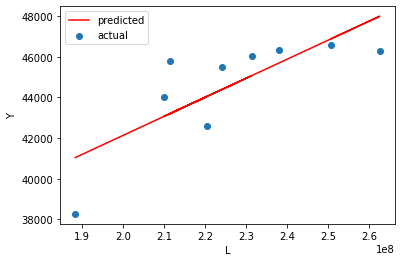

In [5]:
# plot
predicts = model.predict() # Predicted value of the model
x = datas.iloc[:, 2] # The independent variable is column 1 data
plt.scatter(x, y, label='actual') # scatter plot
plt.plot(x, predicts, color = 'red', label='predicted')

plt.xlabel('L')
plt.ylabel('Y')

plt.legend() # Show the legend, that is, each line corresponds to the content in the label
plt.savefig('agri.png')
plt.show() # show plot

## industry

In [6]:
datas_2 = pd.read_excel(r'C:\Users\Daniel Zhang\Desktop\regression_indus.xlsx')
datas_2.describe()

,L,Y
count,9.000000e+00,9.000000e+00
mean,2.228580e+08,2.323951e+13
std,9.515094e+06,5.402295e+12
min,2.055340e+08,1.499566e+13
25%,2.184210e+08,1.916298e+13
50%,2.254390e+08,2.446433e+13
75%,2.309860e+08,2.775718e+13
max,2.324100e+08,2.965477e+13


In [7]:
y_2 = datas_2.iloc[:, 1]
x_2 = datas_2.iloc[:, 0]

In [8]:
x_2 = sm.add_constant(x_2)
model = sm.OLS(y_2, x_2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     16.80
Date:                Tue, 09 Feb 2021   Prob (F-statistic):            0.00458
Time:                        07:16:59   Log-Likelihood:                -270.59
No. Observations:                   9   AIC:                             545.2
Df Residuals:                       7   BIC:                             545.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.306e+13    2.6e+13     -3.200      0.0

C:\Users\Daniel Zhang\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Y = 4.77e+05*L - 8.306e+13

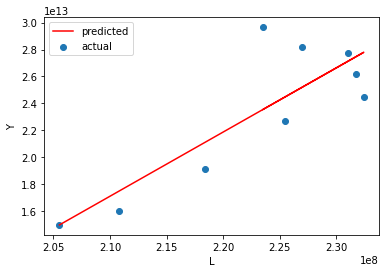

In [9]:
# plot
predicts_2 = model.predict() 
x_2 = datas_2.iloc[:, 0]
plt.scatter(x_2, y_2, label='actual')
plt.plot(x_2, predicts_2, color = 'red', label='predicted')

plt.xlabel('L')
plt.ylabel('Y')

plt.legend() 
plt.show() 

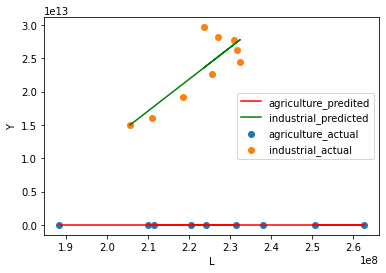

In [10]:
plt.scatter(x, y, label='agriculture_actual')
plt.plot(x, predicts, color = 'red', label='agriculture_predited')
plt.scatter(x_2, y_2, label='industrial_actual')
plt.plot(x_2, predicts_2, color = 'green', label='industrial_predicted')

plt.xlabel('L')
plt.ylabel('Y')

plt.legend()
plt.show() 

### normalize the data in order to plot two lines in one figure

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(datas)
scaled_features = scaler.transform(datas)
df_MinMax = pd.DataFrame(data=scaled_features, columns=["L","Y","L/42", "Y/42"])

y = df_MinMax.iloc[:, 3]
x = df_MinMax.iloc[:, 2]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

predicts = model.predict()
x = df_MinMax.iloc[:, 2]

                            OLS Regression Results                            
Dep. Variable:                   Y/42   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     10.82
Date:                Tue, 09 Feb 2021   Prob (F-statistic):             0.0133
Time:                        07:17:00   Log-Likelihood:                 2.0613
No. Observations:                   9   AIC:                           -0.1226
Df Residuals:                       7   BIC:                            0.2718
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3340      0.149      2.239      0.0

C:\Users\Daniel Zhang\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
scaler_2 = MinMaxScaler()
scaler_2.fit(datas_2)
scaled_features_2 = scaler_2.transform(datas_2)
df_MinMax_2 = pd.DataFrame(data=scaled_features_2, columns=["L", "Y"])

y_2 = df_MinMax_2.iloc[:, 1]
x_2 = df_MinMax_2.iloc[:, 0]

x_2 = sm.add_constant(x_2)
model_2 = sm.OLS(y_2, x_2).fit()
print(model_2.summary())

predicts_2 = model_2.predict()
x_2 = df_MinMax_2.iloc[:, 0] 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     16.80
Date:                Tue, 09 Feb 2021   Prob (F-statistic):            0.00458
Time:                        07:17:00   Log-Likelihood:                 2.2498
No. Observations:                   9   AIC:                           -0.4996
Df Residuals:                       7   BIC:                           -0.1052
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.155     -0.009      0.9

C:\Users\Daniel Zhang\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


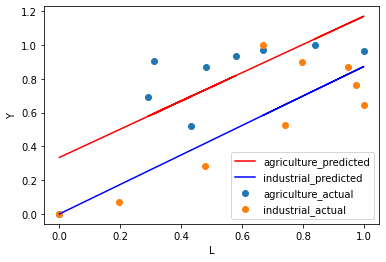

In [13]:
plt.scatter(x, y, label='agriculture_actual') 
plt.plot(x, predicts, color = 'red', label='agriculture_predicted')
plt.scatter(x_2, y_2, label='industrial_actual') 
plt.plot(x_2, predicts_2, color = 'blue', label='industrial_predicted')

plt.xlabel('L')
plt.ylabel('Y')

plt.legend()
plt.savefig('L_vs_Y.png')
plt.show() 

In [14]:
datas = pd.read_excel(r'C:\Users\Daniel Zhang\Desktop\chile_labour_force_wage.xlsx') # Read excel data, the location of the excel file is inside the quotation marks
datas.head()

,Unnamed: 0,Labor Force,Hourly Wages in Manufacturing Index,Employed people,2_Hourly Wages in Manufacturing Index,Unnamed: 5,Unnamed: 6,yearly wage,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2010,1.140065e+07,101.2,7000000,101.2,119.537391,NaN,182160,NaN,yED = 2.507e+05 w - 1.825e+07,NaN,NaN,a,-18250000,NaN,NaN
1,2011,1.243902e+07,107.2,8950000,107.2,121.632006,NaN,192960,NaN,yLS = 8.752e+04 w + 2.861e+06,NaN,NaN,b,-250700,NaN,NaN
2,2012,1.259740e+07,117.2,10760000,117.2,125.123032,NaN,210960,NaN,NaN,NaN,NaN,c,2861000,NaN,NaN
3,2013,1.302932e+07,113.6,9600000,113.6,123.866262,NaN,204480,NaN,p(t)=p(t-1),NaN,NaN,d,87520,NaN,NaN
4,2014,1.321027e+07,118.7,11930000,118.7,125.646685,NaN,213660,NaN,q=qd=qs,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
y = datas.iloc[:, 1]
y_1 = datas.iloc[:, 3]
x = datas.iloc[:, 7]
x_1 = datas.iloc[:, 7]

In [16]:
x = sm.add_constant(x) # If there is an intercept in the model, this step is necessary
model = sm.OLS(y, x).fit() # Build and fit a least squares model
print(model.summary()) # Output regression results

                            OLS Regression Results                            
Dep. Variable:            Labor Force   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     32.30
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           0.000463
Time:                        07:17:00   Log-Likelihood:                -139.14
No. Observations:                  10   AIC:                             282.3
Df Residuals:                       8   BIC:                             282.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.861e+06   1.71e+06      1.675      

C:\Users\Daniel Zhang\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


y = 8.752e+04 w + 2.861e+06

In [17]:
x_1 = sm.add_constant(x_1) # If there is an intercept in the model, this step is necessary
model_1 = sm.OLS(y_1, x_1).fit() # Build and fit a least squares model
print(model_1.summary()) # Output regression results

                            OLS Regression Results                            
Dep. Variable:        Employed people   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.01e-06
Time:                        07:17:00   Log-Likelihood:                -141.21
No. Observations:                  10   AIC:                             286.4
Df Residuals:                       8   BIC:                             287.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.825e+07    2.1e+06     -8.683      

y = 2.507e+05 w - 1.825e+07

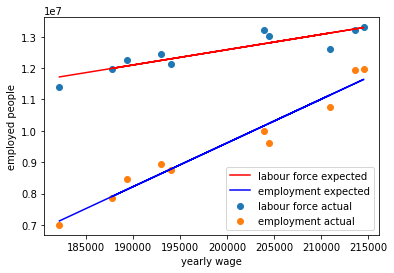

In [18]:
# plot
predicts = model.predict() # Predicted value of the model
x = datas.iloc[:, 7] 
plt.scatter(x, y, label='labour force actual') # Scatter plot
plt.plot(x, predicts, color = 'red', label='labour force expected')

predicts_1 = model_1.predict() # Predicted value of the model
x_1= datas.iloc[:, 7] 
plt.scatter(x_1, y_1, label='employment actual') # Scatter plot
plt.plot(x_1, predicts_1, color = 'blue', label='employment expected')

plt.xlabel('yearly wage')
plt.ylabel('employed people')

plt.legend() # Show the legend, that is, each line corresponds to the content in the label
plt.savefig('year_wage_vs_emp.png')
plt.show() # Display plot